In [1]:
import matplotlib.pyplot as plt
from jax import numpy as jnp

from rhmcjax.targets.Lc2pKpi import Lc2pKpi

## Test class `Lc2pKpi`
The 2D matrix element for the 3-body decay $\Lambda_c^+ \rightarrow pK^-\pi^+$ was first introduced in [this publication](https://doi.org/10.1007/JHEP07(2023)228) and the [associated code](https://doi.org/10.5281/zenodo.7544989) was used to save the model into the file `Lc2pKpi_model.pkl`. More information can be found on the [ComPWA website](https://compwa.github.io/polarimetry/index.html). More detailed information about the construction of the amplitude model can be found [here](https://compwa-org.readthedocs.io/report/021.html) and [here](https://compwa.github.io/polarimetry/intensity.html)
    
The class `Lc2pKpi` loads the matrix element code and includes methods which transform the distribution from the Dalitz plot to the square Dalitz plot and finally to the unit square.
The particle masses are extracted automatically and should correspond to
$$m_{\Lambda_c} = m_0 = 2.28646 ~ \text{GeV}\\ m_p = m_1 = 0.938272081 ~ \text{GeV}\\ m_{\pi} = m_2 = 0.13957039 ~ \text{GeV}\\ m_{K} = m_3 = 0.493677 ~ \text{GeV}~.$$

In [2]:
path_to_matrix_element = f"../targets/Lc2pKpi_model.pkl"

print("Loading density ...")
target = Lc2pKpi(path_to_matrix_element)
print("... done")
print("Masses:", target.m0, target.m1, target.m2, target.m3)

Loading density ...
... done
Masses: 2.28646 0.938272046 0.13957018 0.49367700000000003


### Plot Physical Region of Dalitz Plot

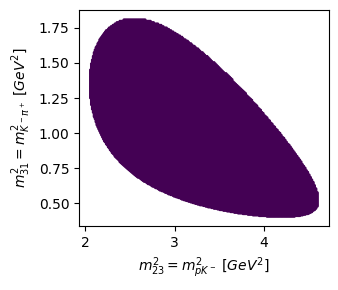

In [3]:
s23vs = jnp.linspace(target.m2 + target.m3, target.m0 - target.m1, 200)[1:-1]**2
s31vs = jnp.linspace(target.m3 + target.m1, target.m0 - target.m2, 202)[1:-1]**2
grid = jnp.dstack(jnp.meshgrid(s23vs, s31vs))
grid = grid.reshape([-1, 2])

physical_region = target.is_physical_nan(grid[:,0], grid[:,1]) # (s23, s31)

plt.figure(figsize=(3.4, 3))
plt.scatter(grid[:,1], grid[:,0], c=physical_region.T, s=1)
plt.xlabel(r"$m_{23}^2 = m_{pK^-}^2 ~ [GeV^2]$")
plt.ylabel(r"$m_{31}^2 = m_{K^-\pi^+}^2 ~ [GeV^2]$")
plt.tight_layout();

Minimal value: 413.42275095000946 , Maximal value: 15839.049553753868


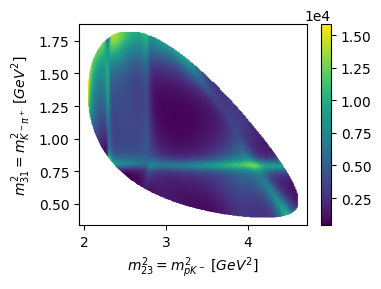

In [4]:
intensity_vals = target.get_decay_rate(grid)
print("Minimal value:", jnp.nanmin(intensity_vals), ", Maximal value:", jnp.nanmax(intensity_vals))

plt.figure(figsize=(3.75, 3))
plt.scatter(grid[:,1], grid[:,0], c=intensity_vals.T, s=1)
cbar = plt.colorbar()
cbar.formatter.set_powerlimits((0, 0))
plt.xlabel(r"$m_{23}^2 = m_{pK^-}^2 ~ [GeV^2]$")
plt.ylabel(r"$m_{31}^2 = m_{K^-\pi^+}^2 ~ [GeV^2]$")
plt.tight_layout();

### Visualize matrix element on unit hypercube

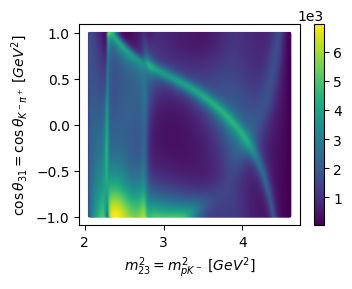

In [5]:
x = y = jnp.linspace(0., 1., 300)[1:-1]
grid_unit = jnp.dstack(jnp.meshgrid(x, y))
grid_unit = grid_unit.reshape([-1, 2])

# transform back to square DP
grid_square, detJ = target.scale_samples_to_original_interval(grid_unit)
dcosdx, ds31dy = detJ[:,0], detJ[:,1]

dp_grid, ds23dcos = target.get_s23_from_cos_theta(grid_square)
I_dp = target.get_decay_rate(dp_grid)
I_square = I_dp * jnp.abs(ds23dcos)
I_square_no_nan = jnp.nan_to_num(I_square, nan=-1)

plt.figure(figsize=(3.75, 3))
plt.scatter(grid_square[:,1], grid_square[:,0], c=I_square_no_nan.T, s=1)
cbar = plt.colorbar()
cbar.formatter.set_powerlimits((0, 0))
plt.xlabel(r"$m_{23}^2 = m_{pK^-}^2 ~ [GeV^2]$")
plt.ylabel(r"$\cos \theta_{31} = \cos \theta_{K^-\pi^+} ~ [GeV^2]$")
plt.tight_layout();

### Test `log_prob`

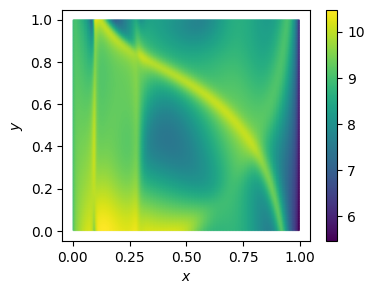

In [6]:
# Unit interval grid
# setup grid with axes [x, y]
x = y = jnp.linspace(0., 1., 300)[1:-1]
grid_unit = jnp.dstack(jnp.meshgrid(x, y))
grid_unit = grid_unit.reshape([-1, 2])

log_probs = target.log_prob(grid_unit)
fig, axs = plt.subplots(1,1, figsize=(4, 3))
pcm0 = axs.scatter(grid_unit[:,1], grid_unit[:,0], c=log_probs, s=.1)
fig.colorbar(pcm0, ax=axs)
axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$y$");
